In [2]:
%load_ext volr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The volr extension is already loaded. To reload it, use:
  %reload_ext volr


# Modelling learning tasks with SNN

Jens Egholm Pedersen ``<xtp778@alumi.ku.dk>``

## Background

* BSc. Political science, Aarhus University
* BSc. Software engineering, IT-University of Copenhagen
* MSc. IT & Cognition, Copenhagen University


* Software engineer at CERN
* Assistant professor at Copenhagen Business Academy

## Structure

1. Introduction to UCN, Copenhagen
2. Connection to neuromorphic hardware
3. Future prospects

# Unit for Cognitive Neuroscience

* Founded by prof. Jesper Mogensen in 1980

* Primary research: 
  * Plasticity in the normal brain
  * Functional analysis of the prefrontal, hippocampal, parietal, and basal ganglia systems
  * Traumatic brain injury

## Reorganisation of Elementary Functions (REF) model

* Rehabilitation based on compensation

* Defines three layers of abstractions (simplified)
  * Surface phenomena
  * Algorithmic strategies
  * Elementary functions

## Current research

* Effects of hippocampal lesions on allocentric navigation
* Functional effects of brain injuries
* Neural correlates of consciousness (NCC)

## Method of inquiry


<br/><br/><br/>



<img src="krechevsky.jpg" style="width: 700px; margin-top: -100px; transform: rotate(-90deg)"/>

## Experimental setup

1. Train genetically identical rats
2. Introduce lesion
3. Test hypothesis

* Iteration time of more than one month
* Experiments are hard to reproduce with a low validity

## Master's thesis

* Why not recreate parts of the behaviour in neuromorphic systems?

* Collaboration between Department of Computer Science and UCN

* Hypothesis: *Elementary Functions can be modelled using spiking neural networks*

# What does that have to do with you...?

* Target audience: cognitive neuropsychologists

* High-level and vague problem domain

## Introducing Volr

* A declarative DSL for building learning systems
  * Reproducible experiments with high validity
  * Helping neuroscientists to build experiments

* Initially: examine feasibility

* Conclusion
  * A working prototype for 2 backends (almost 3) after ~1 week
  * Inclusion of non-expert users
  * Productivity gains, not just for beginners

### Example 1: Graphing a single-population network

Spikes stored in variable `spikes`


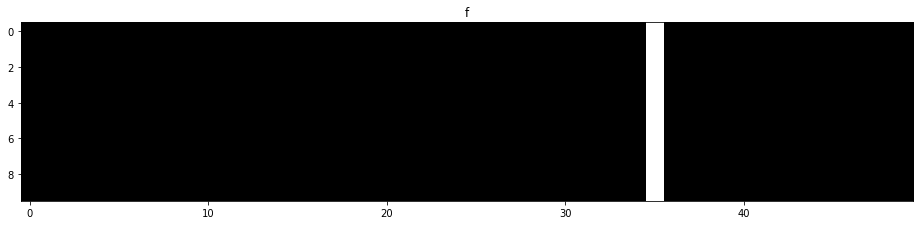

In [3]:
%%volr ssh hel ~/executor.sh 

stimulus s
  input: [20, 21]
        
function f from s excitatory
  neurons: 10
    
response from f excitatory

target nest
   runtime: 50

Spikes stored in variable `spikes`


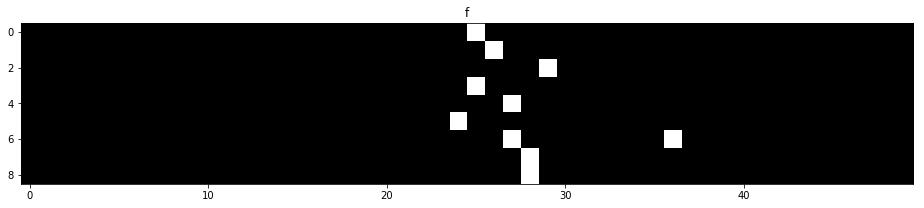

In [18]:
%%volr ssh hel ~/executor.sh wafer

stimulus s
  input: [20, 21]
        
function f from s excitatory
  neurons: 10
    
response from f excitatory

target brainscales
  wafer: 37
  hicann: 297
  runtime: 50

### Example 2: Python integration

In [4]:
stim_spikes = np.random.normal(loc=25, scale=6, size=8)
stim_spikes.sort()
stim_spikes

array([22.39135043, 23.11702577, 23.19889334, 24.68001389, 24.68183817,
       25.12134284, 26.12572315, 35.85689358])

In [1]:
import pandas

In [2]:
import numpy as np

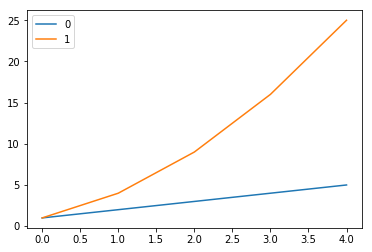

In [15]:
d = [[1, 1], [2, 4], [3, 9], [4, 16], [5, 25]]
pandas.DataFrame(d).plot(kind='line')

Spikes stored in variable `spikes`


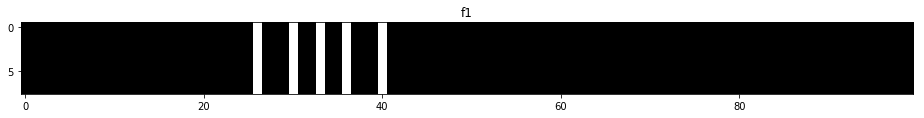

In [6]:
%%volr ssh hel ~/executor.sh

stimulus s
  input: $stim_spikes

function f1 from s excitatory
  weight: 1
  neurons: 8
    
response from f1 excitatory

target nest
  runtime: 100

## Example 3: Excitatory and inhibitory

Spikes stored in variable `spikes`


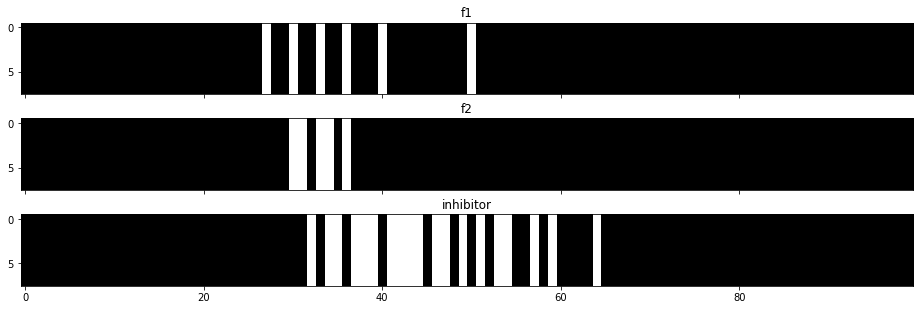

In [9]:
%%volr ssh hel ~/executor.sh

stimulus s
  input: $stim_spikes

function f1 from s excitatory
  neurons: 8
  
function inhibitor 
  from f1 excitatory
    weight: 0.5
  neurons: 8
  
function f2 
  from f1 excitatory
  from inhibitor inhibitory
  neurons: 8

response from f2 excitatory

target nest
  runtime: 100

## Future work and collaboration

* Add learning rules
* Futher integration (DLS, Spikey)
  * Detailed experiments and higher-level concepts
* Future experiments
 * Learning to learn: REF (Mogensen), LSNN (Bellec and Maas), etc.
 * DLS plasticity
* Reproducible regression testing

## Summary

* REF model
* Volr as a DSL for fast and reproducible neuromorphic experiments
* Works needs to be done, but results are promising


Thank you to Mr. Schmitt and Mr. Pehle for the invitation

* Jens Egholm Pedersen: ``jensegholm@protonmail.com``